https://udlbook.github.io/udlbook/  

https://github.com/udlbook/udlbook/blob/main/Notebooks/Chap03/3_1_Shallow_Networks_I.ipynb

# **Блокнот 3.1: Малослойные нейронные сети (Shallow neural networks I)**




Цель этого блокнота - немного познакомиться с малослойными нейронными сетями с одномерными входами. Он работает на примере, подобном рисунку 3.3, и экспериментирует с различными функциями активации.

Проработайте ячейки ниже, запуская каждую ячейку по очереди. В разных местах вы увидите метку "TODO". Следуйте инструкциям в этих местах и напишите код для выполнения функций. В тексте также есть вопросы.

In [1]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

Давайте сначала построим однослойную нейронную сеть с одним входом, тремя скрытыми блоками и одним выходом, описанную в разделе 3.1 книги.

In [7]:
# Определим функцию активации ReLU (Rectified Linear Unit)
def ReLU(preactivation):
    # TODO Напишите код реализации функции активации ReLU и вычисления активации в нейроне скрытого слоя на преактивации ("preactivation").
    # Вычисления должны применяться к каждому элементу ndarray "preactivation" одновременно.
    # Один из способов сделать эти преобразования - с помощью функции ndarray "clip"
    # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.clip.html
    # activation = np.zeros_like(preactivation);
    activation = np.clip(preactivation, 0, np.max(preactivation))
    
    return activation

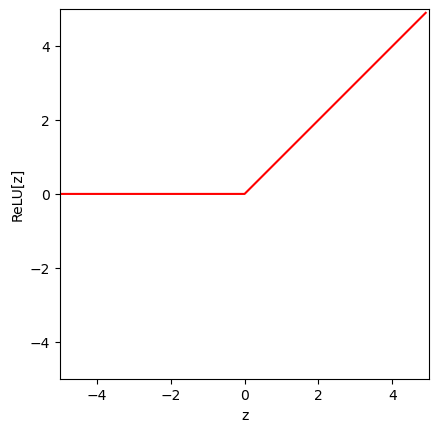

In [8]:
# Создадим массив входных данных
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Построим график функции ReLU
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

In [13]:
x = np.arange(0,1,0.01)
x

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99])

In [20]:
# Определим нейронную сеть с одним входом, одним выходом и тремя скрытыми блоками

def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO Замените строки ниже, чтобы получить три начальные линейные зависимости
  # (рис. 3.3a-c) из параметров theta. Это предварительная активация (preactivations)
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  # Передадим их в функцию ReLU для вычисления активаций (activations),
  # как показано на рисунке 3.3 d-f
  act_1 = ReLU(pre_1)
  act_2 = ReLU(pre_2)
  act_3 = ReLU(pre_3)

  # TODO Замените приведенный ниже код,
  # присвоите каждой активации свой вес, используя phi1, phi2 и phi3,
  # чтобы создать эквивалент рисунка 3.3 g-i
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3


  # TODO Замените приведенный ниже код на комбинирование взвешенных активаций и
  # добавьте phi_0, чтобы создать выходные значение, как показано на рисунке 3.3 j
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Вернем все, что мы вычислили
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [21]:
# Построим нейронную сеть. Предположим, что входные данные находятся в диапазоне [0,1], а выходные [-1,1]
# Если флагу plot_all присвоено значение true, то будут построены все промежуточные этапы, как показано на рисунке 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Построение промежуточных графиков, если установлен флаг
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

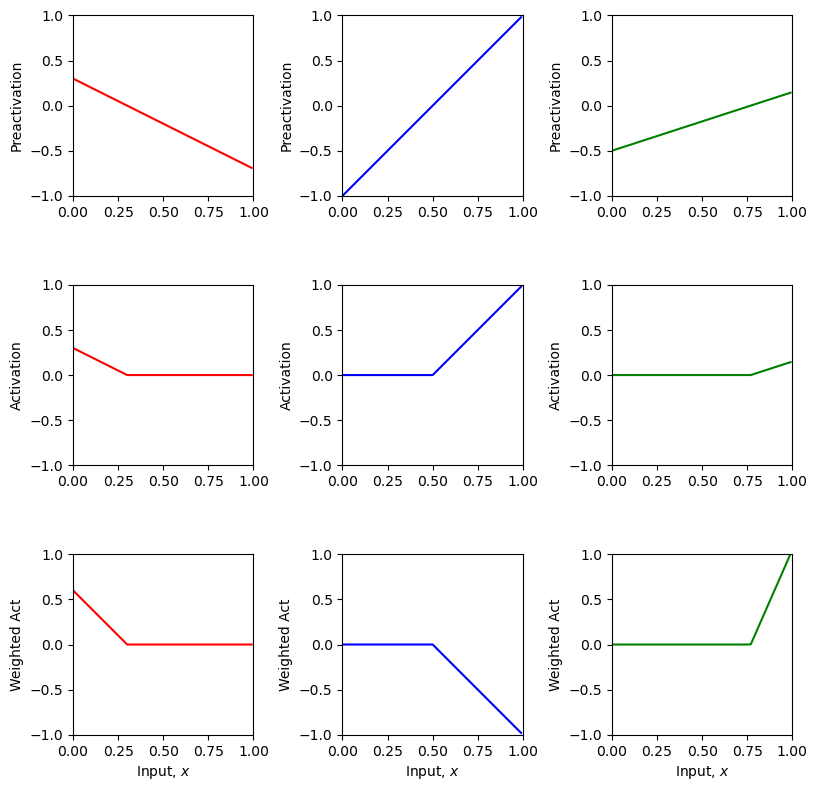

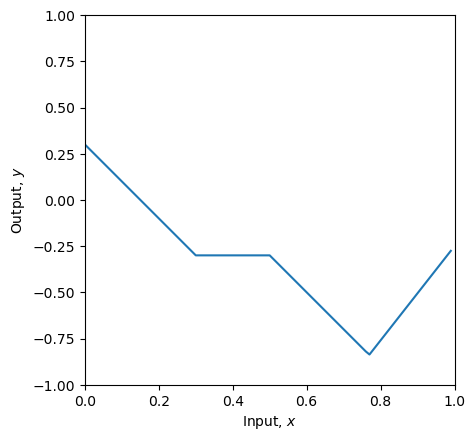

In [22]:
# Теперь давайте определим некоторые параметры и запустим нейронную сеть
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Определим диапазон входных значений
x = np.arange(0,1,0.01)

# Запустим нейронную сеть для каждого из этих входных значений
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# А затем построим полученные зависимости
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

Если ваш код верен, то конечный результат должен выглядеть следующим образом:


Теперь давайте поиграем с параметрами, чтобы убедиться, что мы понимаем, как они работают.  Исходными параметрами были:

$\theta_{10} =  0.3$ ; $\theta_{11} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

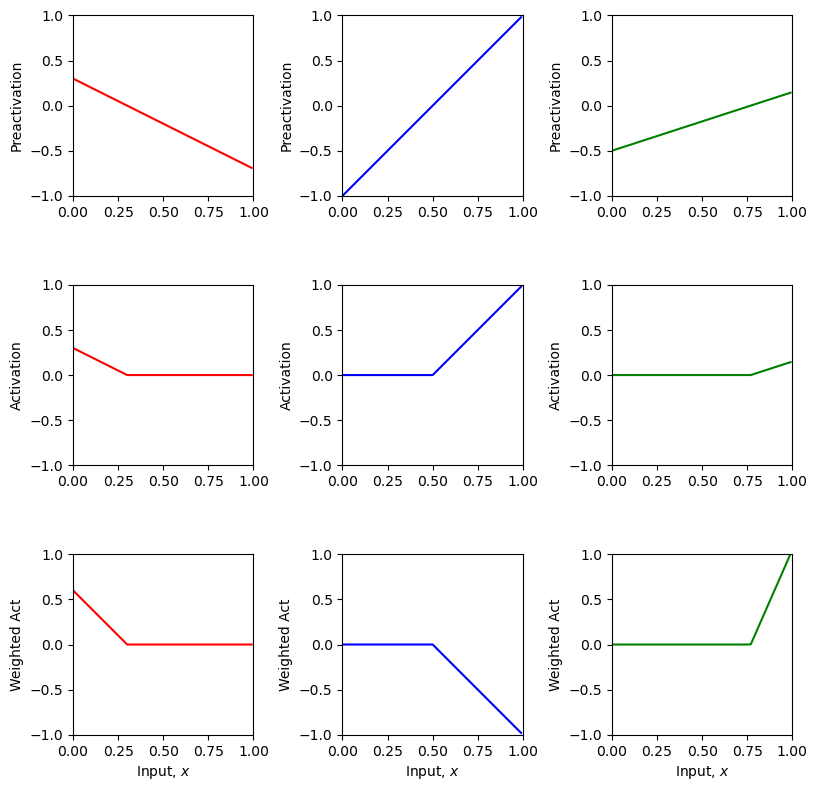

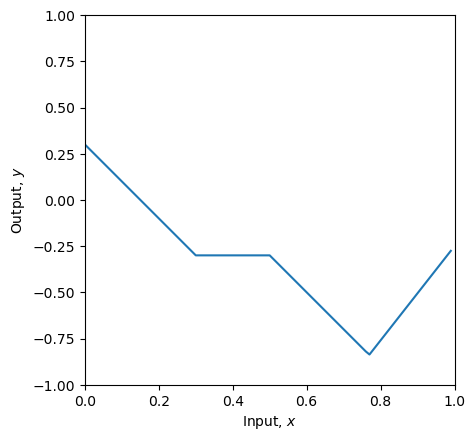

In [23]:
# TODO (Не тратьте слишком много времени на эксперименты, лучше переходите к следующему заданию)
#1. Спрогнозируйте, какой эффект окажет изменение phi_0 на сеть.

# 2. Спрогнозируйте, какой эффект будет иметь умножение phi_1, phi_2, phi_3 на 0.5.  Проверьте, правы ли вы

# 3. Спрогнозируйте, какой эффект даст умножение phi_1 на -1.  Проверьте, правы ли вы.

# 4. Спрогнозируйте, какой эффект даст задание theta_20, равным -1.2.  Проверьте, правы ли вы.

# 5. Измените параметры так, чтобы было только два "стыка" (в том числе за пределами графика)
# Есть три способа сделать это. Попробуйте разобраться во всех них

# 6. С исходными параметрами второй отрезок линии является плоским (т.е. имеет нулевой наклон)
# Как вы могли бы изменить значение theta_10 так, чтобы все отрезки имели ненулевые наклоны

# 7. Что, по вашему прогнозу, произойдет, если вы умножите theta_20 и theta_21 на 0.5, а phi_2 на 2.0?
# Проверьте, правы ли вы.

# 8. Что, по вашему прогнозу, произойдет, если вы умножите theta_20 и theta_21 на -0.5, а phi_2 на -2.0?
# Проверьте, правы ли вы.

theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0


# Определим диапазон входных значений
x = np.arange(0,1,0.01)

# Запустим нейронную сеть для каждого из этих входных значений
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# Построим полученные зависимости
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Least squares loss (квадратичная функция потерь)


Теперь давайте рассмотрим настройку сети по данным.  Сначала нам нужно определить функцию потерь.  Мы будем использовать least squares loss (квадратичную функцию потерь):

\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}(y_{i}-\text{f}[x_{i},\boldsymbol\phi])^2
\end{equation}



где $(x_i,y_i)$ - обучающая пара ввода/вывода, а $\text{f}[\bullet,\boldsymbol\phi]$ - нейронная сеть с параметрами $\boldsymbol\phi$.  Первое слагаемое в скобках - это истинное выходное значение (ground truth output), а второе слагаемое - прогноз модели (prediction of the model)

In [25]:
# Least squares function
def least_squares_loss(y_train, y_predict):
  # TODO Замените строку ниже, чтобы вычислить сумму квадратов
  # различий между реальными значениями y и прогнозируемыми значениями из модели f[x_i,phi]
  # (см. рисунок 2.2 книги)
  # вам нужно будет использовать функцию np.sum
  loss = np.sum((y_predict - y_train) ** 2)

  return loss

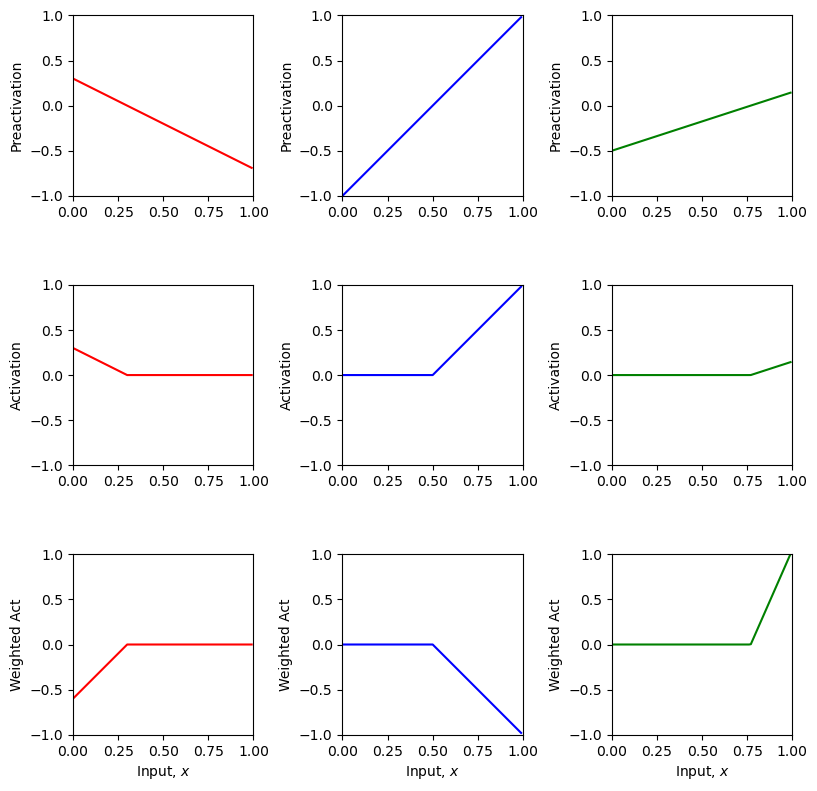

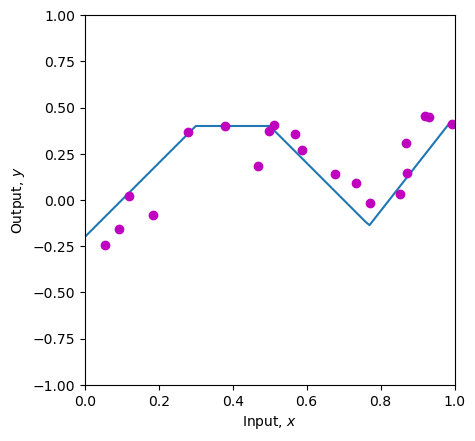

Your Loss = 0.328, True value = 9.385


In [26]:
# Теперь давайте определим некоторые параметры, запустим нейронную сеть и вычислим потери (loss)

theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.4; phi_1 = -2.0; phi_2 = -1.0; phi_3 = 7.0

# Определим диапазон входных значений
x = np.arange(0,1,0.01)

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# Запустим нейронную сеть для каждого из этих входных значений
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# Построим полученные зависимости
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Запустим нейронную сеть на обучающих данных
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Вычислим значение квадратичной функции потерь (least squares loss) и выведем его
loss = least_squares_loss(y_train,y_predict)
print('Your Loss = %3.3f, True value = 9.385'%(loss))

# TODO.  Поизменяйте параметры вручную, чтобы функция лучше соответствовала данным и
# попытайтесь уменьшить потери до как можно меньшего числа.
# Лучшее значение потерь, что смог сделать автор, равно 0.181
# Совет... начните с манипулирования параметром phi_0.
# Это не так просто, поэтому не тратьте на это слишком много времени!
